In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the data
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Pivot the data to have products as rows and countries as columns
data_pivot = data.pivot(index='product', columns='country_code', values='rca').fillna(0)
data_pivot.head()

country_code,AFG,AGO,ALB,ARE,ARG,ARM,ATG,AUS,AUT,AZE,...,USA,UZB,VCT,VEN,VNM,VUT,WSM,ZAF,ZMB,ZWE
product,,,,,,,,,,,,,,,,,,,,,
10121,0.0,0.000525,0.0,0.739279,1.056296,0.000000,0.0,3.419803,0.143024,0.000000,...,1.396207,0.016285,0.0,0.057490,0.000003,0.0,0.0,0.435364,0.014092,0.023167
10129,0.0,0.001302,0.0,0.831250,3.847005,0.000000,0.0,1.909910,0.160763,0.046464,...,0.913726,0.025398,0.0,0.001206,0.000000,0.0,0.0,0.332270,0.006424,0.055113
10130,0.0,0.000000,0.0,0.112284,0.000000,0.000000,0.0,0.000000,0.320575,0.000000,...,1.949010,0.000000,0.0,0.000000,0.000000,0.0,0.0,81.589727,0.000000,0.000000
10190,0.0,0.054931,0.0,0.076845,0.000000,0.000000,0.0,0.066945,0.645310,0.000000,...,1.862858,0.175673,0.0,0.000000,0.000000,0.0,0.0,7.684878,0.204217,0.000000
10221,0.0,0.000000,0.0,0.627763,0.256731,0.868066,0.0,6.842022,5.843820,0.000000,...,0.543571,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.503891,0.020503,0.000000


### Standardise the Data 

In [33]:
from sklearn.preprocessing import StandardScaler

# Standardize the filtered data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_pivot)

# Convert the scaled data back to a DataFrame
data_scaled_df = pd.DataFrame(data_scaled, index=data_pivot.index, columns=data_pivot.columns)
data_scaled_df.head()

country_code,AFG,AGO,ALB,ARE,ARG,ARM,ATG,AUS,AUT,AZE,...,USA,UZB,VCT,VEN,VNM,VUT,WSM,ZAF,ZMB,ZWE
product,,,,,,,,,,,,,,,,,,,,,
10121,-0.051243,-0.029391,-0.109459,0.154957,0.024991,-0.063925,-0.043617,1.154654,-0.356045,-0.062774,...,0.418651,-0.090494,-0.039463,-0.033713,-0.331217,-0.037166,-0.026345,-0.145266,-0.055452,-0.067632
10129,-0.051243,-0.029233,-0.109459,0.217262,0.442974,-0.063925,-0.043617,0.554658,-0.350674,-0.045556,...,-0.005866,-0.089882,-0.039463,-0.068278,-0.331218,-0.037166,-0.026345,-0.164442,-0.055969,-0.066283
10130,-0.051243,-0.029498,-0.109459,-0.269796,-0.133217,-0.063925,-0.043617,-0.204295,-0.302289,-0.062774,...,0.905042,-0.091586,-0.039463,-0.069019,-0.331218,-0.037166,-0.026345,14.949439,-0.056402,-0.068611
10190,-0.051243,-0.018309,-0.109459,-0.293804,-0.133217,-0.063925,-0.043617,-0.177693,-0.203970,-0.062774,...,0.829239,-0.079799,-0.039463,-0.069019,-0.331218,-0.037166,-0.026345,1.203143,-0.042637,-0.068611
10221,-0.051243,-0.029498,-0.109459,0.079411,-0.094765,0.006501,-0.043617,2.514564,1.369959,-0.062774,...,-0.331551,-0.091586,-0.039463,-0.069019,-0.331218,-0.037166,-0.026345,-0.132520,-0.055020,-0.068611


### Analyse how many PCAs we might need

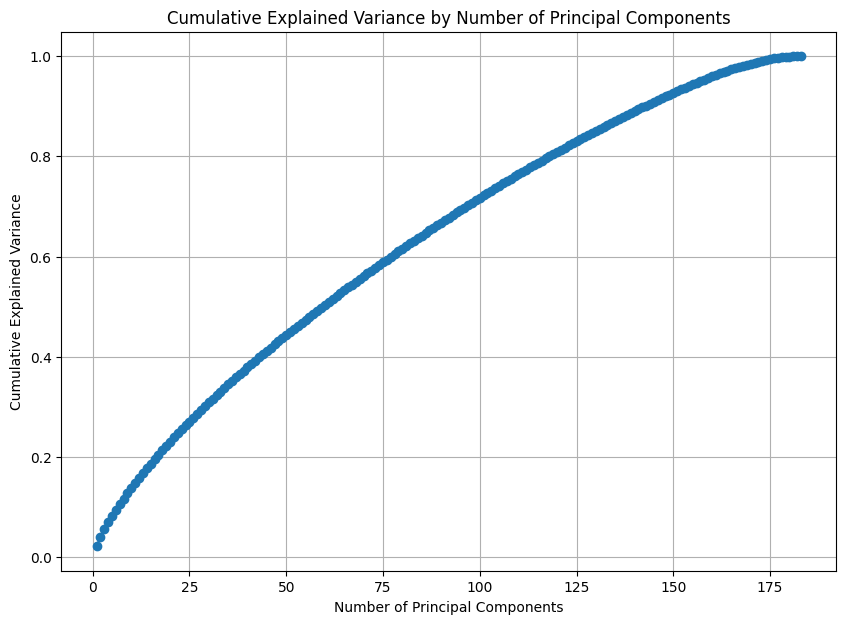

In [34]:
# Perform PCA to capture explained variance ratios for many components
pca = PCA()
pca.fit(data_scaled_df)

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.grid()
plt.show()

### Perform PCA

In [35]:
# Choose the number of components based on the cumulative explained variance plot
num_components = 80

# Perform PCA with the chosen number of components
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(data_scaled_df)

# Create a DataFrame with the principal components
columns = [f'PC{i+1}' for i in range(num_components)]
pca_df = pd.DataFrame(data=principal_components, columns=columns, index=data_scaled_df.index)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80
product,,,,,,,,,,,,,,,,,,,,,
10121,-0.392695,-0.111031,1.039278,0.144150,2.262110,0.757667,-0.792061,-0.067396,-1.028615,-0.572960,...,-0.105394,-0.259720,0.018374,0.279053,0.219936,0.408037,0.889852,-1.938072,-0.748634,-0.669480
10129,-0.321702,-0.089888,0.429482,-0.178547,0.815226,0.110414,-0.354646,-0.134751,-0.504926,-0.519763,...,-0.093249,-0.062280,0.008954,-0.142457,0.354684,-0.020634,-0.036694,0.219596,-0.109646,0.074513
10130,0.373769,0.897898,-2.631083,1.692356,3.242260,-1.469204,-2.387832,-1.647077,-4.813059,-0.895092,...,8.610691,-6.859825,-1.146598,2.747230,-0.267091,-6.645869,6.517755,-0.247794,3.707016,-7.579592
10190,-0.449596,-0.073142,1.108291,0.013842,1.838027,0.424341,-0.471567,-0.464577,-0.453640,0.139671,...,-0.119111,-0.178383,-0.019937,-0.336722,0.310476,0.134713,0.350635,-0.338238,-0.766932,-0.280091
10221,-0.341221,0.130397,0.864588,1.263191,1.246282,0.001814,-0.302140,-0.697275,-0.084469,-0.657215,...,-0.317706,-0.399824,-0.781134,0.172764,0.272663,0.673846,1.048776,-0.506649,-0.670240,0.087490


### (K) Cluster the 4000 products according to PCA components

#### How many clusters do we need? Silhouette analysis

/Users/ben/bruegel/bruvenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ben/bruegel/bruvenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ben/bruegel/bruvenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ben/bruegel/bruvenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

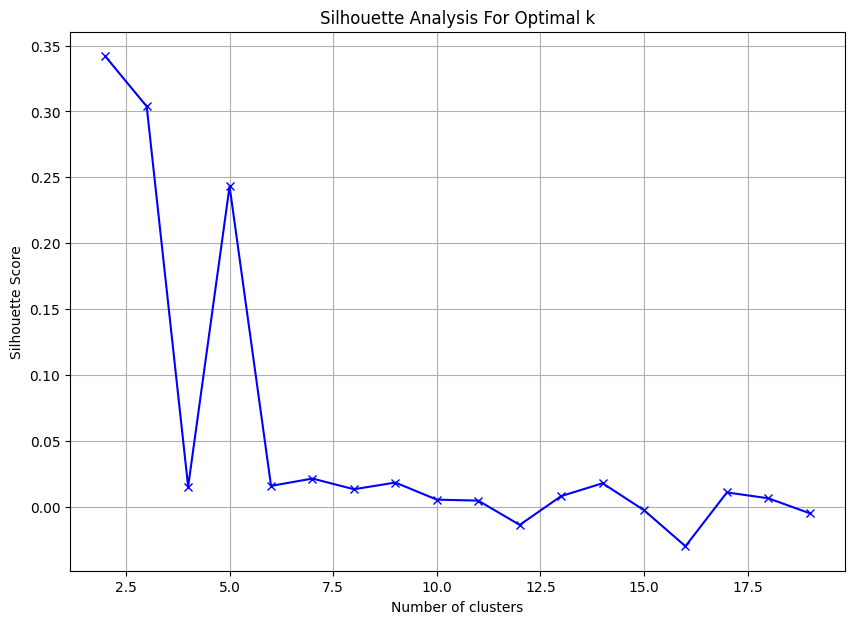

In [26]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
K = range(2, 20)  # Silhouette score is undefined for k=1
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    score = silhouette_score(pca_df, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(10, 7))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.grid()
plt.show()

### Elbow analysis

/Users/ben/bruegel/bruvenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ben/bruegel/bruvenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ben/bruegel/bruvenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ben/bruegel/bruvenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

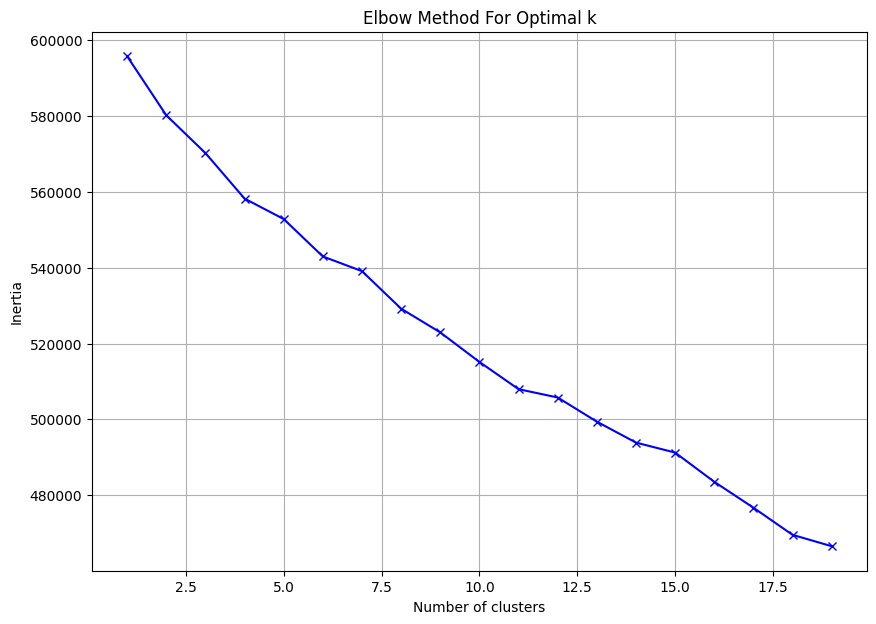

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 20)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=46)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 7))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

### Setting number of clusters

/Users/ben/bruegel/bruvenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


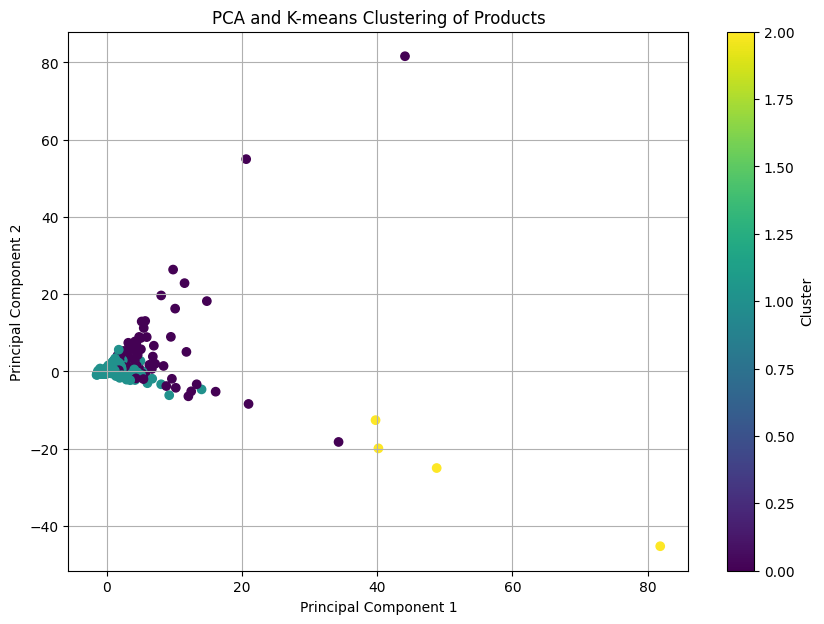

In [36]:
# Determine the number of clusters (k)
k = 3

# Perform K-means clustering on the principal components
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pca_df)

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = kmeans.labels_

# Visualize clusters using the first two principal components
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and K-means Clustering of Products')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

In [38]:
### Return the product codes for each cluster
for cluster in range(k):
    cluster_products = pca_df[pca_df['Cluster'] == cluster].index
    print(f"Cluster {cluster}:")
    print(cluster_products)
    print("\n")

pca_df.to_csv('product_clusters.csv')

Cluster 0:
Int64Index([ 10611,  20450,  30239,  30246,  30279,  30289,  30333,  30341,
             30344,  30349,  30353,  30355,  30357,  30431,  30433,  30463,
             30484,  30510,  30572,  30611,  30752,  30759,  30784,  30788,
             30792,  30799,  50800,  60210,  60311,  60312,  71334,  71360,
             71390,  71430,  71440,  71450,  71490,  80112,  80131,  80270,
             80390,  80410,  80430,  90111,  90240, 100640, 100840, 120300,
            120729, 120730, 120740, 120799, 130120, 150810, 151229, 160414,
            180100, 180200, 180310, 180320, 200891, 200941, 220190, 220840,
            230500, 230610, 252230, 260200, 260600, 260900, 261100, 261210,
            261590, 270900, 271111, 290511, 382476, 410530, 410621, 410622,
            440349, 440399, 440420, 440721, 440722, 440727, 440728, 440729,
            440839, 441019, 520300, 530390, 560729, 720310, 890130, 890190,
            890800],
           dtype='int64', name='product')


Cluster 1:
I

/Users/ben/bruegel/bruvenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ben/bruegel/bruvenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ben/bruegel/bruvenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ben/bruegel/bruvenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

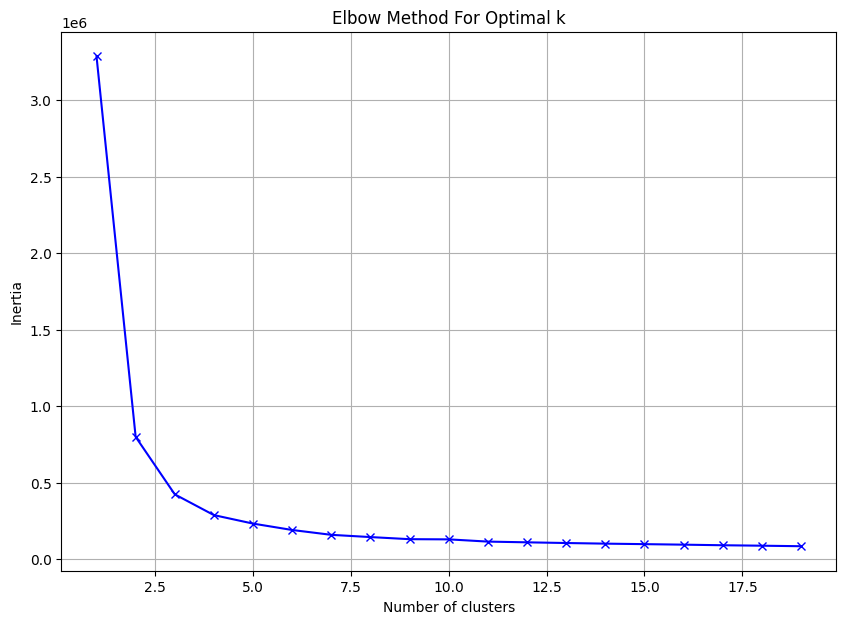